# Homework 2

**The following notebook is meant to help you work through Problems 1 and 3 on Homework 2. You are by no means required to use it, nor are you required to fill out/use any of the boilerplate code/functions. You are welcome to implement the functions however you wish.**


In [1]:
# loading data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as c
import matplotlib.patches as mpatches
from scipy.special import expit as sigmoid
from scipy.special import softmax
from scipy.special import logsumexp

# data for Problem 1
t_obs, y_obs = np.genfromtxt("data/planet-obs.csv", delimiter = ',').T
t_obs = np.split(t_obs, 10)
y_obs = np.split(y_obs.reshape(-1, 1), 10)

# data for Problem 3
data = pd.read_csv("data/hr.csv")
mapper = {
    "Dwarf": 0,
    "Giant": 1,
    "Supergiant": 2
}
data['Type'] = data['Type'].map(mapper)

X_stars = data[['Magnitude', 'Temperature']].values
y_stars = data['Type'].values

from T2_P1_TestCases import test_p1
from T2_P3_TestCases import test_p3_softmax, test_p3_knn

# Problem 1

## Problem 1 Subpart 1

In [10]:
def basis1(t):
    return np.stack([np.ones(len(t)), t], axis=1)

def basis2(t):
    """
    Transform t into basis [1, t, t^2]

    :param t: a 1D numpy array of values to transform. Shape is (n,)
    :return: a 2D array in which each row corresponds to a basis transformation of
             an input value. Shape should be (n x 3)
    """
    # TODO
    t_squared = np.square(t)
    return np.stack([np.ones(len(t)), t, t_squared], axis=1)

def basis3(t):
    """
    Transform t into basis [1, t, t^2, t^3, t^4, t^5]

    :param t: a numpy array of values to transform. Shape is (n,)
    :return: a 2D array in which each row corresponds to a basis transformation of
             an input value. Shape should be (n x 6)
    """
    # TODO
    t_2 = np.square(t)
    t_3 = np.power(t, 3)
    t_4 = np.power(t, 4)
    t_5 = np.power(t, 5)
    return np.stack([np.ones(len(t)), t, t_2, t_3, t_4, t_5], axis=1)

In [3]:
class LogisticRegressor:
    def __init__(self, eta, runs):
        self.eta = eta
        self.runs = runs
        self.W = None

    def fit(self, x, y, w_init):
        """
        Optimize the weights W to minimize the negative log-likelihood by using gradient descent

        :param x: a 2D numpy array of transformed feature values. Shape is (n x 2), (n x 3), or (n x 6)
        :param y: a 2D numpy array of output values. Shape is (n x 1)
        :param w_init: a 2D numpy array that initializes the weights. Shape is (d x 1)
        :return: None
        """
        # Keep this for the autograder
        self.W = w_init

        # iterate self.runs many times
        for r in range(self.runs):
            # calculate predictions with f(x) and apply sigmoid to find probabilities
            preds = sigmoid(x @ self.W) # (n, 1)
            # compare preds with y_train to calculate loss
            diffs = preds - y # (n, 1)
            # calculate likelihoods from (y^ - y)x
            likelihoods = x.T @ diffs # (d, n) @ (n, 1) = (d, 1)
            # average likelihoods
            grads = likelihoods / x.shape[0]
            # apply eta 
            updates = self.eta * grads # (d, 1)
            # update w in the opposite direction of gradients to minimize log likelihood
            self.W = np.subtract(self.W, updates)



            # below is messy code before using linear algebra
                        
            # gradient for this iteration
            # grads = np.zeros(self.W.shape) # (d, 1)

            # nll before updates
            # nll = 0

            # calc gradient for each datum
            # grads = []
            
            

            # preds2 = []
            # for n in range(x.shape[0]):
            #     # pred = 1/(1+np.exp(-self.W.T @ x[n]))
            #     pred = sigmoid(self.W.T @ x[n].T) # (1)
            #     preds2.append(pred)

            #     # nll -= (y[n]*np.log(pred)) + ((1-y[n])*np.log(1-pred))

            #     grad = (y[n] - pred) * x[n].T # (d,)
            #     grads.append(-1 * grad)
                # grad = grad.reshape(-1,1) # (d, 1)
                # np.subtract(grads, grad, grads) # (d, 1)
                # print("gshape: ", grad.shape)
                # print("gsshape: ", grads.shape)
                # print("grad: ", grad)
                # print("GRADS: ", grads)
            
            # for n in range(len(preds)):
                # grad = (preds[n] - y[n]) * x[n].T # (d,)
                # grads.append(grad) # (n, d)
                # grad = (y[n] - preds[n]) * x[n].T
                # grads.append(-1 * grad)

            # print("preds:", preds)
            # print("preds2: ", np.array(preds2))
                
            # gradsavg = np.mean(np.array(grads), axis=0) # (d,)
            # gradsavg = gradsavg.reshape(-1, 1) # (d, 1)
            

            # gradsa = np.array(gradsa)
            # print("gradsx shape:", gradsx.shape)
            # print("gradsx:", gradsx)
            # gradsxa = np.mean(gradsa, axis=0)
            # print("gradsxa shape:", gradsxa.shape)
            # print("gradsxa:", gradsxa)


            # average gradients
            # grads = grads / x.shape[0]
            # gradsxa = gradsxa.reshape(-1, 1)
            # grads = gradsxa
            # print("gradsxa:", gradsxa)
            # print("grads: ", grads)

            # print("NLL: ", nll)
            
            # update w 
            # for w in range(self.W.shape[0]):
            # updates = self.eta * grads # (d, 1)
            # self.W = np.subtract(self.W, updates)
            # if r == self.runs - 1:
                # print("W: ", self.W)
            
            # print("W: ", self.W)
            
            # calc nll
            # nll2 = 0
            # for n in range(x.shape[0]):
            #     pred = sigmoid(self.W.T @ x[n].T) # (1)
            #     nll2 -= (y[n]*np.log(pred)) + ((1-y[n])*np.log(1-pred))
            
            # if r == 1:
            # print("NLL1: {} \nNLL2: {}".format(nll, nll2))

    def predict(self, x):
        """
        Predict classification probability of transformed input x
        
        :param x: a 2D numpy array of transformed feature values. Shape is (n x 2), (n x 3), or (n x 6)
        :return: a 2D numpy array of predicted probabilities given current weights. Shape should be (n x 1)
        """
        # TODO
        # y_pred = np.dot(self.W.T, x[0].T)
        sigmoid_vectorized = np.vectorize(sigmoid)
        boundary_dists = np.dot(x, self.W) # (n, 1)
        y_preds = sigmoid_vectorized(boundary_dists) # (n, 1)
        return y_preds

In [4]:
test_p1(LogisticRegressor, basis1, basis2, basis3)

Your test case results are, for basis 1, 2, and 3 respectively: Pass Pass Fail


In [5]:
# Function to visualize prediction lines
# Takes as input last_x, last_y, [list of models], basis function, title
# last_x and last_y should specifically be the dataset that the last model
# in [list of models] was trained on
def visualize_prediction_lines(last_x, last_y, models, basis, title):
    # Plot setup
    green = mpatches.Patch(color='green', label='Ground truth model')
    black = mpatches.Patch(color='black', label='Mean of learned models')
    purple = mpatches.Patch(color='purple', label='Model learned from displayed dataset')
    plt.legend(handles=[green, black, purple], loc='lower right')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Observed')
    plt.axis([0, 6, -.1, 1.1]) # Plot ranges

    # Plot dataset that last model in models (models[-1]) was trained on
    cmap = c.ListedColormap(['r', 'b'])
    plt.scatter(last_x, last_y, c=last_y, cmap=cmap, linewidths=1, edgecolors='black')

    # Plot models
    X_pred = np.linspace(0, 6, 1000)
    X_pred_transformed = basis(X_pred)

    ## Ground truth model
    plt.plot(X_pred, np.cos(1.1*X_pred + 1) * 0.4 + 0.5, 'g', linewidth=5)

    ## Individual learned logistic regressor models
    Y_hats = [] # (10 x (n x 1))
    for i in range(len(models)):
        model = models[i]
        Y_hat = model.predict(X_pred_transformed) # (n x 1)
        Y_hats.append(Y_hat)
        if i < len(models) - 1:
            plt.plot(X_pred, Y_hat, linewidth=.3)
        else:
            plt.plot(X_pred, Y_hat, 'purple', linewidth=3)

    # npyhats = np.array(Y_hats)
    # print("Y_hats shape:", npyhats.shape)

    # Mean / expectation of learned models over all datasets
    plt.plot(X_pred, np.mean(Y_hats, axis=0), 'k', linewidth=5)

    plt.savefig(title + '.png')
    plt.show()

In [21]:
# You may find it helpful to modify this function for Problem 1, Subpart 4,
# but do not change the existing code--add your own variables
def plot_results(basis, title):
    eta = 0.001
    runs = 10000

    all_models = []
    for i in range(10):
        x, y = t_obs[i], y_obs[i]
        x_transformed = basis(x) # (n x d)
        model = LogisticRegressor(eta=eta, runs=runs) 
        model.fit(x_transformed, y, np.zeros((x_transformed.shape[1], 1))) # (n x 1)
        all_models.append(model)

    # test point t = 0.1
    # testx = [0.1]
    # testx_transformed = basis(testx)
    # predict with first model
    # testx_pred = all_models[0].predict(testx_transformed)
    # print("pred: ", testx_pred)

    # test point t = 3.2
    testx = [3.2]
    testx_transformed = basis(testx)
    # compute variance of 10 models
    testx_preds = []
    for m in all_models:
        testx_preds.append(m.predict(testx_transformed))
    testx_variance = np.var(testx_preds)
    
    print("var:", testx_variance)
    print(testx_preds)
    visualize_prediction_lines(x, y, all_models, basis, title)

var: 0.005660057219763854
[array([[0.60743925]]), array([[0.60739082]]), array([[0.45829835]]), array([[0.64372313]]), array([[0.63107324]]), array([[0.62994375]]), array([[0.51759329]]), array([[0.61219045]]), array([[0.69686862]]), array([[0.46585616]])]


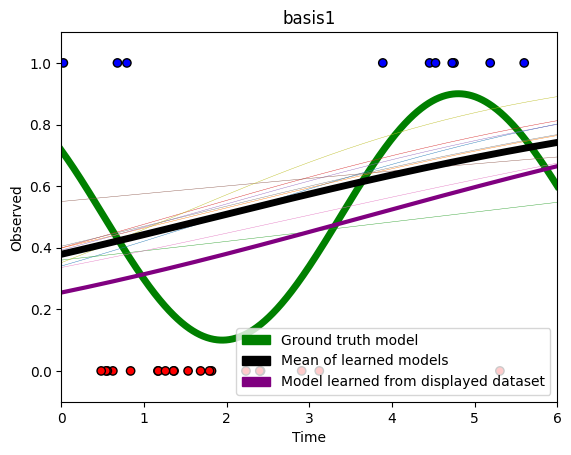

var: 0.011807015051122485
[array([[0.44202576]]), array([[0.52253817]]), array([[0.36100333]]), array([[0.55838572]]), array([[0.49109383]]), array([[0.60379355]]), array([[0.40085368]]), array([[0.54602461]]), array([[0.65042803]]), array([[0.28070066]])]


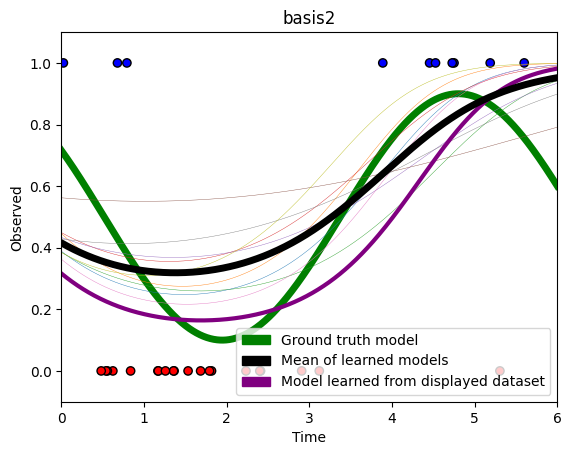

var: 0.2499555618600618
[array([[1.]]), array([[0.99999992]]), array([[1.52338096e-26]]), array([[0.00044435]]), array([[1.09090241e-56]]), array([[1.]]), array([[1.06212345e-08]]), array([[1.]]), array([[0.99999989]]), array([[1.702059e-34]])]


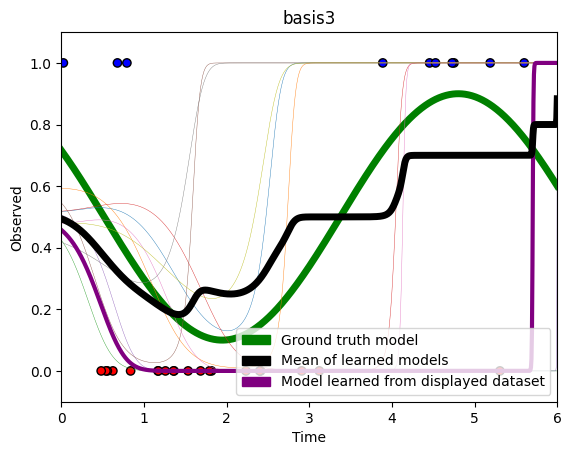

In [22]:
plot_results(basis1, 'basis1')
plot_results(basis2, 'basis2')
plot_results(basis3, 'basis3')

# Problem 3

In [277]:
def bias_basis(X):
    return np.stack([np.ones(X.shape[0]), X.T[0], X.T[1]], axis=1)

In [285]:
class SoftmaxRegression:
    def __init__(self, eta, lam):
        self.eta = eta
        self.lam = lam
        self.W = None

    def fit(self, X, y):
        """
        Fit the weights W of softmax regression using gradient descent with L2 regularization
        in the form (lambda/2) * norm(w)^2
        Use the results from Problem 2 to find an expression for the gradient
        
        :param X: a 2D numpy array of (transformed) feature values. Shape is (n x 2)
        :param y: a 1D numpy array of target values (Dwarf=0, Giant=1, Supergiant=2).
        :return: None
        """
        # Initializing the weights (do not change!)
        # The number of classes is 1 + (the highest numbered class)
        num_classes = 1 + y.max()
        num_features = X.shape[1]
        self.W = np.ones((num_classes, num_features))
        # TODO

        # HOW TO ADD BIAS TERM

            # can use a basis transformation to add [1] to beginning of feature maps
            # i.e. [x_1, x_2] -> [1, x_1, x_2] (d+1,)
            # phi(x): (d+1,1) = phi(X[0]).T

            # weight matrix also needs to incorporate extra feature (k,d+1)
            # dist = (k,d+1)(d+1,1) = (k,1)

            # generalizes to big PHI = Phi(X)
            # Phi(X): (n,d+1) = Phi(X)
            # preds = Phi(X) @ self.W.T = PHI @ W: (n,d+1)(d+1,k) = (n,k)

            # except what happens if we forget to apply the "bias" basis when predicting?
            # model.predict calls W (k,d+1) on (n,d) matrix, which fails...
            # have to implement "bias basis" in model code for fit, predict_proba

        # X = bias_basis(X) # (n,d+1) = (n,3) x_0 is 1
        # update num_features because X.shape different now
        num_features = X.shape[1]
        # also have to update self.W
        self.W = np.ones((num_classes, num_features))

        max_iterations = 200000
        for runs in range(max_iterations):



            # CONCEPTUAL UNDERSTANDING OF LINEAR ALGEBRA BEHIND MODEL BOUNDARY

                # consider calculation for one pred y^ = s(Wx)
                # X[0]: (1,d) = (d,) = (2,)
                # X[0].T = x: (d,1)
                # self.W = w (k,d)
                # pred = self.W @ X[0].T = wx: (k,d)(d,1) = (k,1)
                # pred = self.W @ X[0].T
                # need to transpose each feature vector from big array X if doing one pred

                # now consider multiple preds
                # X: (n,d) = (n,2)
                # self.W.T = W (d,k) = (2,3)
                # preds = X @ self.W.T = Phi*W: (n,d)(d,k) = (n,k) = (n,3)
                # probs = [] #(n,3)
                # need to transpose self.W to multiply big X with W

                # note that X is an n sized array of x.T
                # W is just w.T



            # MATRIX + ITERATIVE CALCULATION OF W GRADIENTS ACROSS ALL OBSERVATIONS

            # apply f_w to X (all feature vectors/all observations), a.k.a apply decision boundaries
            dists = X @ self.W.T # (n,k) = (n,3)
            # dists can be considered matrix Z of shape (n,k) where Z[k].T (k,1) represents z_k (k,1)

            # create matrix for grads with same shape as W
            grads = np.zeros(self.W.shape) #(k,d)
            # formula from Problem 2 iterates through each observation
            for n in range(X.shape[0]):
                # apply softmax function to z_n, where prob[j] = model's predicted probability for n being class j
                prob = softmax(dists[n]) # dists[n]: (k,)
                # consider grads for each weight separately
                for j in range(self.W.shape[0]):
                    # ynj is indicator of whether we are considering the observed class of observation n
                    ynj = 1 if j == y[n] else 0
                    # calculate difference/cost with model's predicted probability of n being class j and ynj
                    diff = prob[j] - ynj # (1,)
                    # calculate derivative of likelihood wrt class j's weight vector (w_j)
                    dwj = diff * X[n] # (d,) or (1,d)
                    # ultimate gradient of w_j is the sum of this calculation for all n observations
                    grads[j] = np.add(grads[j], dwj) # (d,) or (1,d)



                # CONCEPTUAL UNDERSTANDING OF L2 REGULARIZATION IMPLEMENTATION

            # l2 norm calculation:
            # lam/2 * norm(W)**2
            # l2reg = (self.lam/2) * np.linalg.norm(self.W)**2

            # wait, but the L2 norm is only for vectors of shape (n,)!

            # given that our self.W is dimension (k,d), we should be regularizing across one axis
            # inuitively, we should probably be regularizing across w_j
            # or in other words, regularizing the norm of each class weight vector
            # this means that "bigger" class weight vectors are punished more by cost function
            # this would reduce the disparity between the model's preference for any given class.
            # regularizing across dimensions would reduce the norm of each dimension
            # which would reduce the disparity between the impact of each feature on the prediction

            # calculation of l2 norm for a weight vector w_j (d,):
            # l2reg[j] = self.lam/2 * np.linalg.norm(self.W[j])**2 (1,)
            
            # but we need the partial of this to determine updates to minimize loss
            # norm(W[j]) = ||W[j]||^2
            # d/dw_j norm(W[j]) = 2*W[j] (d,)
            # d/dw_j l2reg = self.lam * W[j] (d,)

            # now the dimensions match up; update[j] is (d,), l2reg[j] is (d,)



                # L2 GRADIENT CALCULATION PER CLASS

            l2reg = np.zeros(grads.shape) #(k,d)
            for j in range(self.W.shape[0]):
                l2reg[j] = self.lam * self.W[j] #(d,)



                # UPDATE APPLIED TO WEIGHT MATRIX

            # update is (k,d) matrix of k grads (per class) with l2 reg cost added per class
            updates = grads + l2reg
            # apply eta after adding l2reg bc l2reg comes from grad of loss function
            updates *= self.eta
            # subtract to go in opposite direction of grads of log likelihood
            self.W = np.subtract(self.W, updates)



                # BELOW IS SCRAPPED CODE
            
             # for j in range(grads.shape[0]):
            #     grads[j] /= X.shape[0]
            #     updates[j] = self.eta * grads[j]

            # grads[j] /= X.shape[0] # average
            # l2regj = 0
            
            # for j in range(grads.shape[0]):
                # l2reg = self.lam * self.W[j] # (1,d)
                # grads[j] = np.add(grads[j], l2reg) # (1,d)
                # print("grad {}: {}".format(j, grads[j]))
                # updates[j] = grads[j] - l2regj
                # updates[j] *= self.eta # (1,d)
                # print("weight {}: {}".format(j, self.W[j]))

            # update


            # grads = np.zeros(self.W.shape)
            # for j in range(self.W.shape[0]):
            #     grads[j] = np.zeros([X[0].shape[0]]) # (d,)
            #     for n in range(X.shape[0]):
            #         pred_z = self.W @ X[n].T #(k,) = (k,d)(d,1)
            #         probs = softmax(pred_z) #(k,)
            #         sj = probs[j]
            #         ynj = 1 if j == y[n] else 0
            #         diff = probs[j] - ynj
            #         nll_n = diff * X[n] # (d,)
            #         grads[j] += nll_n
            
            # updates = grads * self.eta
            
            # for weight 
            # for j in range(self.W.shape[0]): # for k classes
            #     # for weight j = 1
            #     for n in range(X.shape[0]):
            #         ynj = 0
            #         if j == y[n]: 
            #             ynj = 1
            #         else:
            #             ynj = 0
            #         diff = probs[n][j] - ynj
            #         dwj = diff * X[n]

            # diffs = probs - y
            # softmax_vectorized = np.vectorize(softmax)
            # preds = softmax_vectorized(X @ self.W.T)
        

    def predict(self, X_pred):
        """
        The code in this method should be removed and replaced! We included it
        just so that the distribution code is runnable and produces a
        (currently meaningless) visualization.
        
        Predict classes of points given feature values in X_pred
        
        :param X_pred: a 2D numpy array of (transformed) feature values. Shape is (n x 2)
        :return: a 1D numpy array of predicted classes (Dwarf=0, Giant=1, Supergiant=2).
                 Shape should be (n,)
        """
        # TODO

        # OLD CODE 

        # preds = []
        # for x in X_pred:
        #     z = np.cos(x ** 2).sum()
        #     preds.append(1 + np.sign(z) * (np.abs(z) > 0.3))
        # return np.array(preds)

        # PREDICTING FROM PROBABILITIES
        # convert probabilities to discrete classification by taking largest prob for class j

        # calc probs of each class for each x
        # don't need to use bias basis because predict code calls rest of model
        pred_probs = self.predict_proba(X_pred) # (n,3)
        # print("pred_probs:", pred_probs)
        
        preds = [] # discrete preds (n,)
        # find max prob and convert to index of class
        for x in pred_probs:
            k = np.argmax(x) # (3,) -> (1,)
            preds.append(k)

        # return array of class marker for all X
        return np.array(preds)
    
    def predict_proba(self, X_pred):
        """    
        Predict classification probabilities of points given feature values in X_pred
        
        :param X_pred: a 2D numpy array of (transformed) feature values. Shape is (n x 2)
        :return: a 2D numpy array of predicted class probabilities (Dwarf=index 0, Giant=index 1, Supergiant=index 2).
                 Shape should be (n x 3)
        """
        # TODO

        # have to apply bias basis to apply weights
        # X_pred = bias_basis(X_pred)
        # apply boundary to find dists/z_s for all observations
        find_zs = X_pred @ self.W.T # (n, k)
        # extra bias term dimension math no longer concern bc it has dissolved through matrix mult

        # iterate through each observation to convert into probabilities with softmax
        y_preds = np.ones(find_zs.shape) # (n, k)
        for z in range(find_zs.shape[0]):
            y_preds[z] = softmax(find_zs[z]) #(k,)

        return y_preds
        

In [326]:
class KNNClassifier:
    def __init__(self, k):
        self.X = None
        self.y = None
        self.K = k

    def distance(self, a, b):
        # two inputs a, b both with shape (d,) = (2,)
        return (a[0] - b[0])**2/9 + (a[1] - b[1])**2
        
    def fit(self, X, y):
        """
        In KNN, "fitting" can be as simple as storing the data, so this has been written for you.
        If you'd like to add some preprocessing here without changing the inputs, feel free,
        but this is completely optional.
        """
        self.X = X
        self.y = y

    def predict(self, X_pred):
        """
        The code in this method should be removed and replaced! We included it
        just so that the distribution code is runnable and produces a
        (currently meaningless) visualization.
        
        Predict classes of points given feature values in X_pred
        
        :param X_pred: a 2D numpy array of (transformed) feature values. Shape is (n x 2)
        :return: a 1D numpy array of predicted classes (Dwarf=0, Giant=1, Supergiant=2).
                 Shape should be (n,)
        """
        # TODO
        # preds = []
        # for x in X_pred:
        #     z = np.cos(x ** 2).sum()
        #     preds.append(1 + np.sign(z) * (np.abs(z) > 0.3))
        # return np.array(preds)

            # CONCEPTUALIZING KNN CLASSIFICATION

        # pred for one data point X[n] (d,) = x_n (d,1)
        # dist calc for two data points x_1, x_2 = dist(X[1],X[2]) 
        # dist = (1,)
        # dist(X[a], X[b]) = (X[a][0] - X[b][0])**2/9 + (X[a][1] - X[b][1])**2
        
        # calculate kNN for each observation x in X_pred
        preds = np.zeros(X_pred.shape[0])
        for n in range(X_pred.shape[0]): # (d,)
            # nearest = []
            # for i in range(X_pred.shape[0]):
            #     if n != i:
            #         d = self.dist(X_pred[n], X_pred[i])
            #         nearest.append((d,i))
            
            # sorted array of dist and n index
            # sortnear = sorted(nearest, key=lambda x: x[0], reverse=True)
            # key = sort by minimizing dist value
            # lambda x: dist between X[n] and x
            indices = range(self.X.shape[0])
            argsortnear = sorted(indices, key = lambda x: self.distance(X_pred[n], self.X[x]))
        
            # knear = []
            # for i in range(self.K):
                # # find majority class of knn for x
                # n_index = sortnear[i][1]
                # knear.append(self.y[n_index])
                # knear.append(sortnear[i][1])

            # indices of the k nearest neighbors to X_pred selected from self.X (k,)
            argknear = argsortnear[0:self.K]

            neighborclasses = []
            for k in argknear:
                nclass = self.y[k]
                neighborclasses.append(nclass)

            

            from collections import Counter
            # count with one-hot encoding
            neighborclasses.count
            maj = max(set(neighborclasses), key = neighborclasses.count)
            # counts = np.bincount(np.array(neighborclasses))
            # maj = np.argmax(counts)

            pred = maj
            preds[n] = pred
            
        return preds


In [280]:
def phi(X):
    """
    Transform [x_1, x_2] into basis [ln(x_1 + 10), x_2^2]

    :param t: a 2D numpy array of values to transform. Shape is (n x 2)
    :return: a 2D array in which each row corresponds to a basis transformation of
             an input value. Shape should be (n x 2)
    """
    # TODO
    X_1 = X.T[0]
    X_2 = X.T[1]
    T_1 = np.log(X_1 + 10)
    T_2 = np.square(X_2)
    return np.stack([T_1, T_2], axis=1)

## Plotting Function for Problem 3, Subpart 1

In [303]:
# Visualize the decision boundary that a model produces
def visualize_boundary(model, X, y, title, basis=None, width=2):
    # Create a grid of points
    x_min, x_max = min(X[:, 0] - width), max(X[:, 0] + width)
    y_min, y_max = min(X[:, 1] - width), max(X[:, 1] + width)
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.05),
        np.arange(y_min, y_max, 0.05)
    )

    # Flatten the grid so the values match spec for self.predict
    xx_flat = xx.flatten()
    yy_flat = yy.flatten()
    X_pred = np.vstack((xx_flat, yy_flat)).T
    
    if basis is not None:
        X_pred = basis(X_pred)

    # Get the class predictions
    Y_hat = model.predict(X_pred) # (n,)
    # print("Y_hat:",Y_hat)
    Y_hat = Y_hat.reshape((xx.shape[0], xx.shape[1])) # ()

    # Visualize them.
    cmap = c.ListedColormap(['r', 'b', 'g'])
    plt.figure()
    plt.title(title)
    plt.xlabel('Magnitude')
    plt.ylabel('Temperature')
    plt.pcolormesh(xx, yy, Y_hat, cmap=cmap, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, linewidths=1,
                edgecolors='black')

    # Adding a legend and a title
    red = mpatches.Patch(color='red', label='Dwarf')
    blue = mpatches.Patch(color='blue', label='Giant')
    green = mpatches.Patch(color='green', label='Supergiant')
    plt.legend(handles=[red, blue, green])

    # Saving the image to a file, and showing it as well
    plt.savefig(title + '.png')
    plt.show()

## Problem 3, Subpart 1

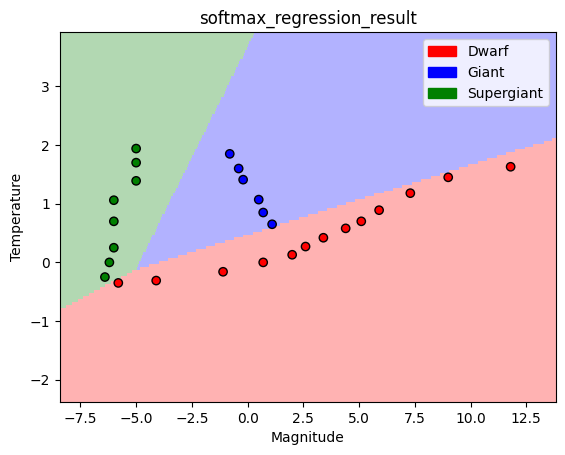

In [286]:
# Example of fitting a model and visualizing the decision boundaries;
# do this for each of the four models
softmax_model = SoftmaxRegression(eta=0.001, lam=0.001)
softmax_model.fit(bias_basis(X_stars), y_stars)

visualize_boundary(model=softmax_model,
                   X=X_stars,
                   y=y_stars,
                   title='softmax_regression_result',
                   basis=bias_basis)

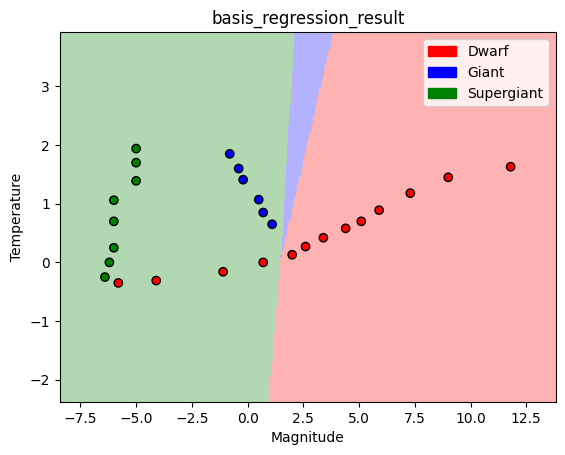

In [294]:
phiX_stars = phi(X_stars)

# no L2 reg for 3b
basis_model = SoftmaxRegression(eta=0.001, lam=0.001)
basis_model.fit(bias_basis(phiX_stars), y_stars)

visualize_boundary(model=basis_model,
                   X=X_stars,
                   y=y_stars,
                   title='basis_regression_result',
                   basis=bias_basis)

In [295]:
test_p3_softmax(softmax_model, basis_model)

Passed softmax regression tests


In [296]:
# test your models by passing your fitted models into the functions below
# softmax_model is an instance of class SoftmaxRegression fitted to data X_stars, y_stars
# basis_model is an instance of class SoftmaxRegression fitted to data phi(X_stars), y_stars
# knn1_model is an instance of class KNNClassifier with parameter k=1
# knn5_model is an instance of class KNNClassifier with parameter k=5
biasl2_model = SoftmaxRegression(eta=0.001, lam=0.001)
biasl2_model.fit(bias_basis(X_stars), y_stars)

basis_model = SoftmaxRegression(eta=0.001, lam=0.000)
basis_model.fit(bias_basis(phi(X_stars)), y_stars)

test_p3_softmax(softmax_model, basis_model)
# test_p3_knn(knn1_model, knn5_model)

AssertionError: Failed for basis regression: incorrect weights

In [328]:
knn1_model = KNNClassifier(1)
knn1_model.fit(X_stars, y_stars)

knn5_model = KNNClassifier(5)
knn5_model.fit(X_stars, y_stars)

test_p3_knn(knn1_model, knn5_model)

Passed KNN tests


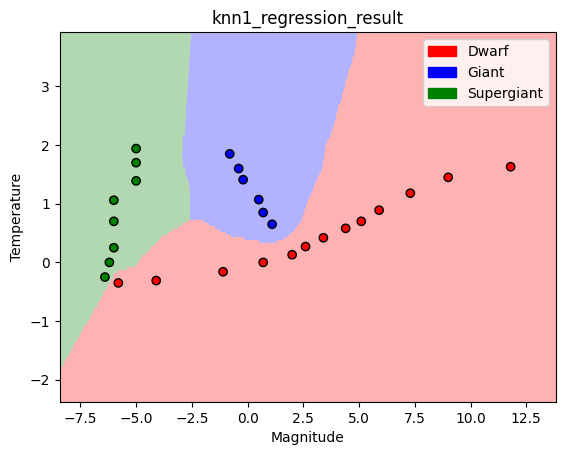

In [331]:
visualize_boundary(model=knn1_model,
                   X=X_stars,
                   y=y_stars,
                   title='knn1_regression_result',
                   basis=None)

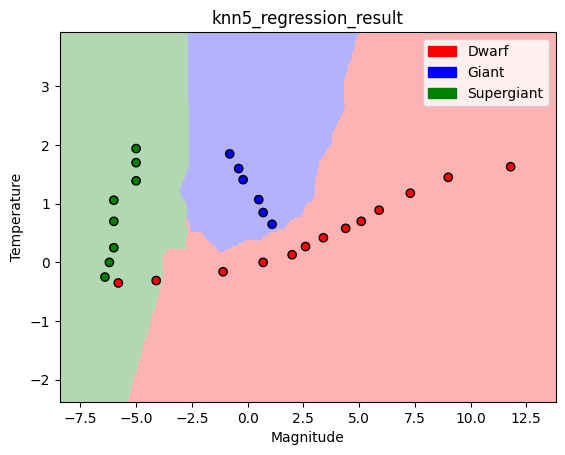

In [332]:
visualize_boundary(model=knn5_model,
                   X=X_stars,
                   y=y_stars,
                   title='knn5_regression_result',
                   basis=None)